# Does Handwashing Save Lives?
## Analyzing The Data Behind One Of The Most Important Discoveries Of Dr. Semmelweis: Handwashing

## Introduction
<div style="display: flex; align-items: center;">
  <div style="flex: 40%; text-align: center;">
    <img src='./data/ignaz_semmelweis_1860_small.jpeg' width="100%">
  </div>
  <div style="flex: 60%; padding-left: 15px;">
    <p>Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. 
    Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% 
    of the women giving birth died from it at the Vienna General Hospital. Dr. Semmelweis discovered that it was the 
    contaminated hands of the doctors delivering the babies, and on <strong>June 1st, 1847</strong>, he decreed that 
    everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.
    </p>
  </div>
</div>

In this project, we will analyze the data that made Dr. Semmelweis discover the importance of handwashing and its impact on the hospital and the number of deaths. We will also test our hypothesis which says there is no difference in monthly death rates between before and after handwashing started.

**Dataset:**
The data is stored as two CSV files in the `data` folder and their formats are as follows. The dataset used in this project can be downloaded from [here](https://projects.datacamp.com/projects/2526).

`data/yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`data/monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

To get started on analyzing in Python, we will need some packages below:
- `pandas`: It is a data analysis and manipulation library that provides data structures and tools.
- `matplotlib.pyplot`: It is a plotting library for creating visualizations in Python.
- `seaborn`: It provides a high-level interface for drawing attractive and informative statistical graphics.
- `scipy.stats`: It contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, and more.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [2]:
# Set the theme of plots
sns.set_theme(style= 'darkgrid', palette='Set2')

In [3]:
# Read dataset (you need to provide the related file path where your files saved)
yearly_data = pd.read_csv('./data/yearly_deaths_by_clinic.csv')
yearly_data

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [4]:
# Read dataset (you need to provide the related file path where your files saved)
clinic1 = pd.read_csv('./data/monthly_deaths.csv')
clinic1

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [5]:
# Check data types
clinic1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    98 non-null     object
 1   births  98 non-null     int64 
 2   deaths  98 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [6]:
# Check NaNs
clinic1.isna().sum()

date      0
births    0
deaths    0
dtype: int64

In [7]:
# Change the data type of date column
clinic1['date'] = pd.to_datetime(clinic1['date'])

### What year had the highest yearly proportion of deaths?

In [8]:
# Add a column to show proportion of death
yearly_data['death_per'] = (yearly_data['deaths'] / yearly_data['births'] * 100).round(2)

# Sort the data by death_per to find the highest ratio
highest_year = yearly_data.sort_values('death_per', ascending= False).head(1)['year'].iloc[0]

# Print the answer
print(f'{highest_year} had the highest yearly proportion of deaths.')

1842 had the highest yearly proportion of deaths.


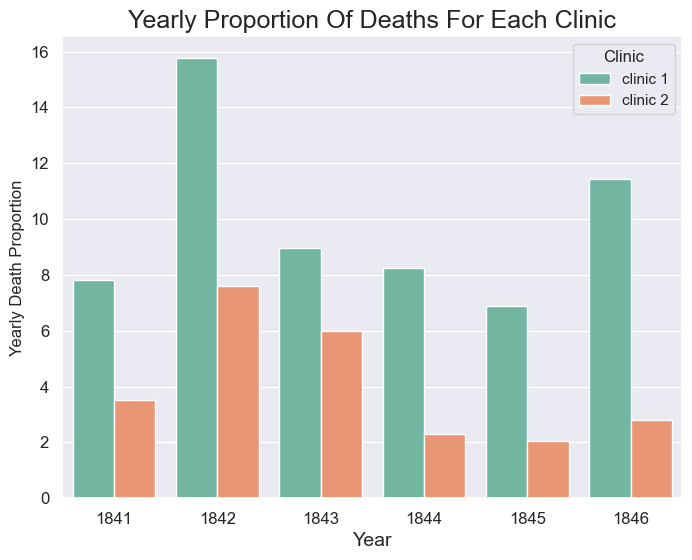

In [9]:
# Visualize yearly death proportion for each clinic
# Set the size of the plot
plt.figure(figsize=(8,6))

# Create the plot, change the title and legend
sns.barplot(data= yearly_data, x= 'year', y= 'death_per', hue= 'clinic')
plt.title('Yearly Proportion Of Deaths For Each Clinic', fontsize= 18)
plt.legend(title= 'Clinic')

# Change labels and their settings
plt.xlabel('Year', fontsize= 14)
plt.xticks(fontsize= 12)
plt.ylabel('Yearly Death Proportion')
plt.yticks(fontsize= 12)

# Show the plot
plt.show();

### What are the average proportions of deaths before and after handwashing from the monthly data?

In [10]:
# Add a column to show whether data was recorded before or after hand washing began
handwashing_start = pd.to_datetime('1847-06-01')
clinic1['handwashing_started'] = clinic1['date'] >= handwashing_start

# Add a column to show proportion of death
clinic1['death_proportion'] = (clinic1['deaths'] / clinic1['births'] * 100).round(2)

# Calculate the average death ratio before and after handwashing_start 
monthly_summary = clinic1.groupby('handwashing_started')['death_proportion'].mean().round(2)
monthly_summary

handwashing_started
False    10.50
True      2.11
Name: death_proportion, dtype: float64

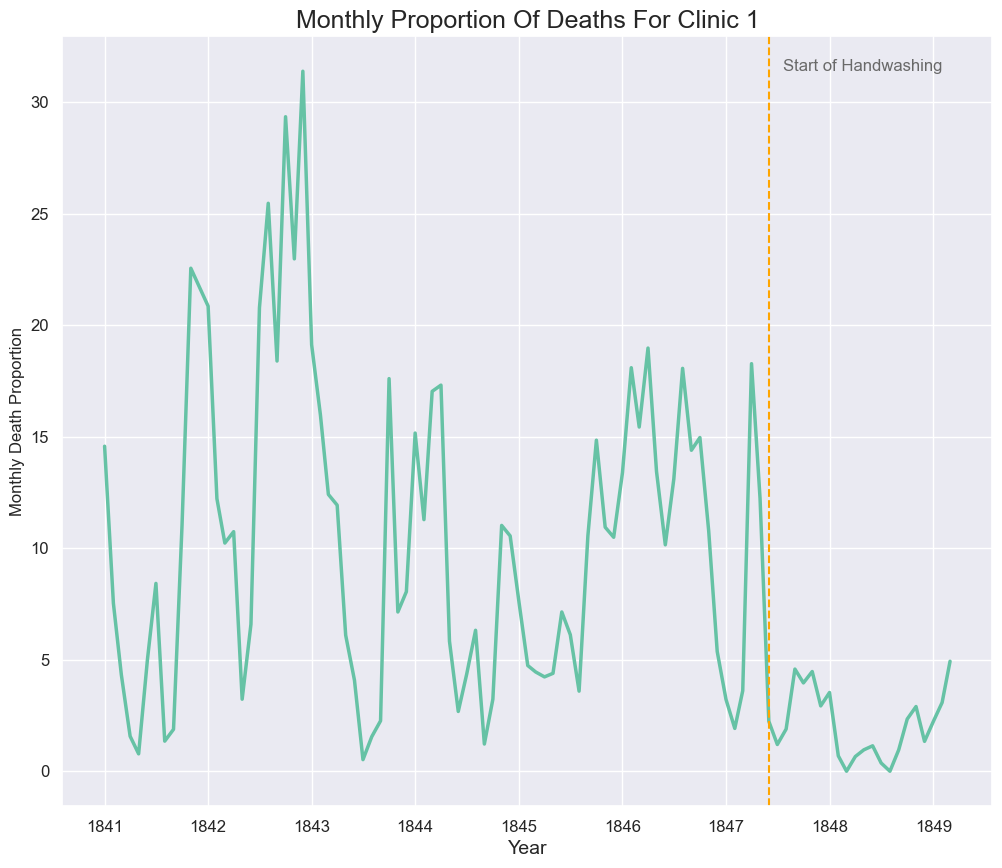

In [11]:
# Visualize monthly death proportion for clinic 1
# Set the size of the plot
plt.figure(figsize=(12,10))

# Create the plot, change the title
ax = sns.lineplot(data= clinic1, x= 'date', y= 'death_proportion', linewidth= 2.5)
plt.title('Monthly Proportion Of Deaths For Clinic 1', fontsize= 18)

# Add a vertical reference line at the handwashing start date
ax.axvline(x= handwashing_start, color='orange', linestyle='--')

# Annotate the reference line
ax.annotate(
    'Start of Handwashing', # The text to display
    xy=(handwashing_start, clinic1['death_proportion'].max()), # Point of annotation (x, y)
    xytext=(handwashing_start + pd.Timedelta(days=50), clinic1['death_proportion'].max() + 0.03), # Position of the text
    fontsize=12, color='dimgray'
)

# Change labels and their settings
plt.xlabel('Year', fontsize= 14)
plt.xticks(fontsize= 12)
plt.ylabel('Monthly Death Proportion')
plt.yticks(fontsize= 12)

# Show the plot
plt.show();

## Is the monthly death proportion before handwashing started bigger than after handwashing started? 
- H0 = There is no difference in monthly death proportions between before and after handwashing started.
- H1 = The monthly death proportion before handwashing started is bigger than after handwashing started.

In [12]:
# Filter data as before and after
before = clinic1.loc[clinic1['handwashing_started'] == False, 'death_proportion']
after = clinic1.loc[clinic1['handwashing_started'] == True, 'death_proportion']

In [13]:
# Statistical Testing 

# Set alpha, confidence interval is 95%
alpha = 0.05 # Common significance level

# Mann-Whitney U test as an alternative for non-normal distributions with unequal sample sizes
u_stat, p_val_mannwhitney = mannwhitneyu(before, after, alternative='greater')

# Print the result
print(f"Mann-Whitney U test: U-statistic = {u_stat}, p-value = {p_val_mannwhitney}")

if p_val_mannwhitney < alpha:
    print("Reject the null hypothesis: Significant difference, and death proportions were higher before handwashing.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the groups.")

Mann-Whitney U test: U-statistic = 1505.0, p-value = 6.27812953819387e-09
Reject the null hypothesis: Significant difference, and death proportions were higher before handwashing.
